<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Tempat Tinggal               100 non-null    int64 
 1   Pekerjaan Orang Tua          100 non-null    object
 2   Penghasilan Orang Tua        100 non-null    int64 
 3   Jumlah Tanggungan Orang Tua  100 non-null    int64 
 4   Kendaraan                    100 non-null    int64 
 5   Kelayakan Keringanan UKT     100 non-null    object
dtypes: int64(4), object(2)
memory usage: 4.8+ KB
None
       Tempat Tinggal  Penghasilan Orang Tua  Jumlah Tanggungan Orang Tua  \
count      100.000000           1.000000e+02                   100.000000   
mean         0.500000           5.427000e+06                     2.590000   
std          0.502519           2.533128e+06                     1.129002   
min          0.000000           7.000000e+05                     1.000000   
2

<ipython-input-1-a87740cfb582>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kelayakan Keringanan UKT', data=data, palette='viridis')


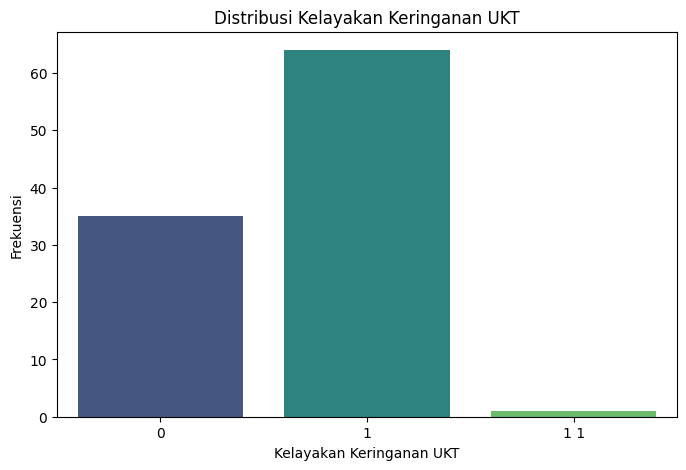

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.9375 0.9375 0.875  1.     0.875 ]
Rata-rata cross-validation score: 0.9250
Confusion Matrix:
[[ 3  2]
 [ 0 15]]


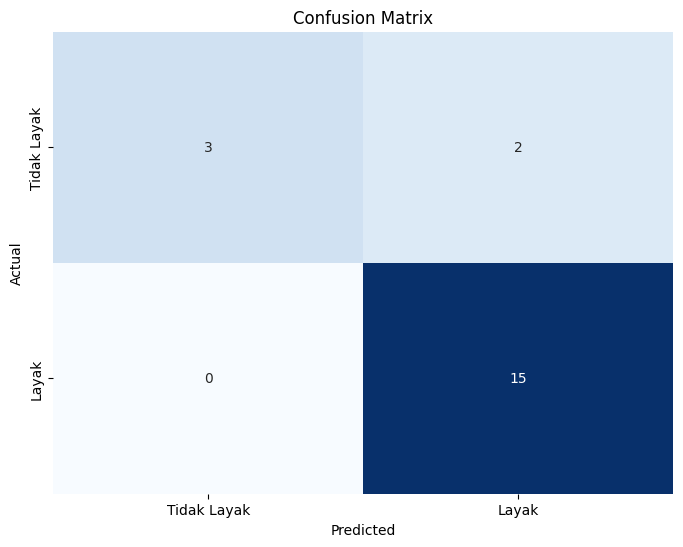


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.88      1.00      0.94        15

    accuracy                           0.90        20
   macro avg       0.94      0.80      0.84        20
weighted avg       0.91      0.90      0.89        20

Akurasi: 90.00%


<ipython-input-1-a87740cfb582>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette='viridis')


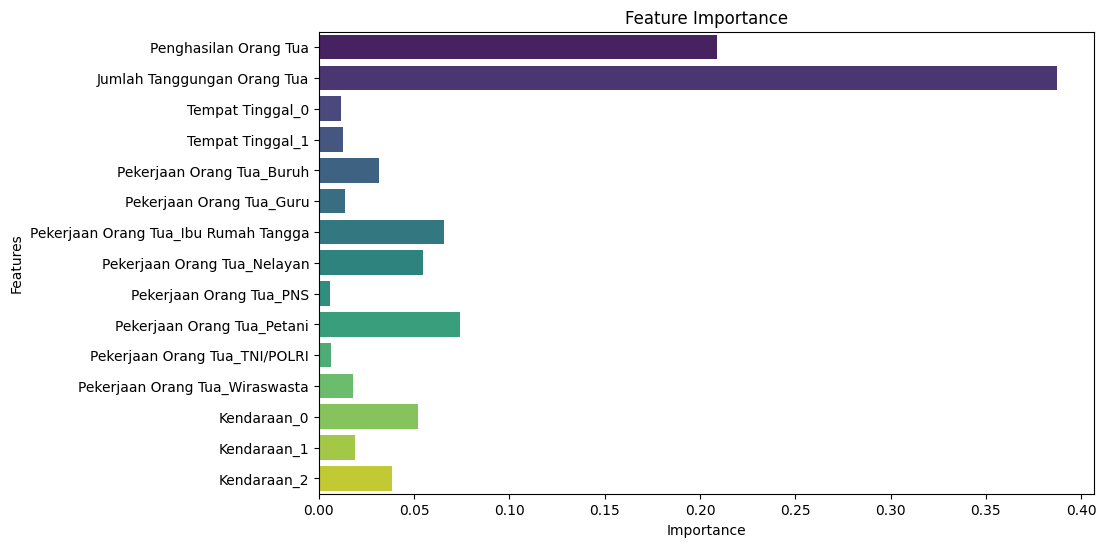

Model disimpan sebagai 'model_klasifikasi.pkl'


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# 1. Business Understanding
# Tujuan: Menganalisis faktor-faktor yang mempengaruhi kelayakan keringanan UKT mahasiswa

# 2. Data Understanding
# Memuat data
data = pd.read_csv('klasifikasimhs.csv')

# Menampilkan informasi data
print(data.info())
print(data.describe())

# Visualisasi distribusi kelayakan keringanan UKT
plt.figure(figsize=(8, 5))
sns.countplot(x='Kelayakan Keringanan UKT', data=data, palette='viridis')
plt.title('Distribusi Kelayakan Keringanan UKT')
plt.xlabel('Kelayakan Keringanan UKT')
plt.ylabel('Frekuensi')
plt.show()

# 3. Data Preparation
# Memisahkan fitur dan target
X = data.drop(columns=['Kelayakan Keringanan UKT'])
y = data['Kelayakan Keringanan UKT']

# Menggunakan OneHotEncoder untuk fitur kategorikal
categorical_features = ['Tempat Tinggal', 'Pekerjaan Orang Tua', 'Kendaraan']
numeric_features = ['Penghasilan Orang Tua', 'Jumlah Tanggungan Orang Tua']

# Membuat pipeline untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),  # Fitur numerik
        ('cat', OneHotEncoder(), categorical_features)  # Fitur kategorikal
    ]
)

# 4. Modeling
# Membuat model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model
model.fit(X_train, y_train)

# Cross-validation untuk mengukur performa model secara lebih konsisten
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Rata-rata cross-validation score: {cv_scores.mean():.4f}')

# 5. Evaluation
# memprediksi data uji
y_pred = model.predict(X_test)

# Menampilkan hasil evaluasi
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualisasi confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Tidak Layak', 'Layak'], yticklabels=['Tidak Layak', 'Layak'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menampilkan feature importance dari RandomForest
model_rf = model.named_steps['classifier']
feature_names = numeric_features + list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
feature_importances = model_rf.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# 6. Deployment
# Menyimpan model
joblib.dump(model, 'model_klasifikasi.pkl')
print("Model disimpan sebagai 'model_klasifikasi.pkl'")
